## Projekt zaliczeniowy - Bootcamp data science
***

## Anna Kossakowska

### Zastosowanie modeli klasyfikacji (binarnej) do przewidzenia czy pożyczka zostanie udzielona danemu klientowi z danymi parametrami wniosku

***
#### Spis treści
1. Zaczytanie i analiza danych<br>
    1.1. Imputacja braków danych<br>
    1.2. Przekształcenie danych
2. Modelowanie
3. Porównanie modeli
4. Ostateczna postać modelu

***

## Zaczytanie i analiza danych

In [1]:
# podstawowe importy
import pandas as pd
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("dane/Train.csv")

In [3]:
# porównanie kilku pierwszych wierszy z odpowiednikami z csv w Notepad++, pierwsza podstawowa wzrokowa weryfikacja formatów kolumn 
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [4]:
data.shape

(87020, 26)

### Imputacja braków danych

In [5]:
# weryfikacja braków danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

In [6]:
data.isnull().sum()

ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                     0
Disbursed                    0
dtype: int64

Oba sposoby weryfikacji pokazały, że braki danych występują dla 11 zmiennych.
Weryfikacja, czy braki danych nie zostały oznaczone wartością inna niż NaN. Spojrzenie na najpopularniejsze wartości dla każdej zmiennej i lepsze zapoznanie sie ze zbiorem danych.

In [8]:
for column in data.columns:
    print(column)
    print(data[column].value_counts())

ID
ID097742I20    1
ID061039R40    1
ID002376K10    1
ID027557X20    1
ID004980O00    1
              ..
ID040490I00    1
ID056000W00    1
ID024240I00    1
ID054402K20    1
ID042745B00    1
Name: ID, Length: 87020, dtype: int64
Gender
Male      49848
Female    37172
Name: Gender, dtype: int64
City
Delhi                 12527
Bengaluru             10824
Mumbai                10795
Hyderabad              7272
Chennai                6916
                      ...  
RADHANPUR                 1
Nalbari                   1
Dhalai                    1
North Cachar Hills        1
Pulwama                   1
Name: City, Length: 697, dtype: int64
Monthly_Income
25000    5823
20000    4523
15000    4246
30000    3216
50000    2392
         ... 
21612       1
58490       1
15521       1
33974       1
36978       1
Name: Monthly_Income, Length: 5825, dtype: int64
DOB
11-Nov-80    306
02-Jan-70    226
01-Jan-70    148
01-Jan-90    131
01-Jan-80    111
            ... 
20-Jul-64      1
05-Nov-94     

##### Wnioski 
- Zmienne Existing_EMI, Loan_Amount_Applied, Loan_Tenure_Applied  w przypadku braku zostaną wypełnione 0, bo taka wartość występowała już w dziedzinie tych zmiennych.
- Zmienna Employer_Name wypełniona "0" (format znakowy, nie numeryczny). Uzasadnienie jak wyżej.
- Zmienne Loan_Amount_Submitted, Loan_Tenure_Submitted, Interest_Rate, Processing_Fee, EMI_Loan_Submitted zostaną wypełnione wartością -1, aby odróżnić brak danych od pozostałych wartości tych zmiennych. Wartość 0 dla tych zmiennych nie istniała, stąd uzupełnienie -1. 
- Zmienna Salary_Account wypełniona wartością znakową 'NA'.

In [10]:
# Usunięcie zmiennych LoggedIn (zalecenie z opisu projektu) oraz ID (unikalny identyfikator, nie może być zmienna objaśniającą)
data.drop(["ID","LoggedIn"], axis=1, inplace=True)

In [11]:
# wydawałoby się, że Lead_Creation_date, czy może świadczyć o stażu klienta w banku
# wygląda, że wszystkie rekordy zostały utworzone w 2015, więc zmienna zostaje usunięta
data.drop(["Lead_Creation_Date"], axis=1, inplace=True)
# Usunięcie zmiennych Source i Var1, zmienne nieznane (brak opisu), przyjmujące wiele kategorii.
data.drop(["Source", "Var1"], axis=1, inplace=True)

In [12]:
# Imputacja dla zmiennych numerycznych 
data.Loan_Amount_Applied.fillna(0,inplace=True)
data.Loan_Tenure_Applied.fillna(0,inplace=True)
data.Existing_EMI.fillna(0,inplace=True)
data.Loan_Amount_Submitted.fillna(-1, inplace=True)
data.Loan_Tenure_Submitted.fillna(-1, inplace=True)
data.Interest_Rate.fillna(-1, inplace=True)
data.Processing_Fee.fillna(-1, inplace=True)
data.EMI_Loan_Submitted.fillna(-1, inplace=True)

In [13]:
# Imputacja dla zmiennych kategorycznych 
data.Employer_Name.fillna("0",inplace=True)
data.Salary_Account.fillna("NA", inplace=True)

In [14]:
# Braki występowały również dla zmiennej City, zostanie przekształcona w kolejnym etapie i w ten sposób braki zostaną wypełnione.

In [15]:
# weryfikacja czy wszystkie braki zostały uzupełnione
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 87020 non-null  object 
 1   City                   86017 non-null  object 
 2   Monthly_Income         87020 non-null  int64  
 3   DOB                    87020 non-null  object 
 4   Loan_Amount_Applied    87020 non-null  float64
 5   Loan_Tenure_Applied    87020 non-null  float64
 6   Existing_EMI           87020 non-null  float64
 7   Employer_Name          87020 non-null  object 
 8   Salary_Account         87020 non-null  object 
 9   Mobile_Verified        87020 non-null  object 
 10  Var5                   87020 non-null  int64  
 11  Loan_Amount_Submitted  87020 non-null  float64
 12  Loan_Tenure_Submitted  87020 non-null  float64
 13  Interest_Rate          87020 non-null  float64
 14  Processing_Fee         87020 non-null  float64
 15  EM

### Przekształcenia danych

#### Utworzenie zmiennej wiek na podstawie DOB

In [16]:
# dane pochodzą z 2015, dlatego wiek liczony na dzień 2015-01-01
def calculate_age(born):
    born = datetime.strptime(born, '%d-%b-%y').date()
    today = date(2015, 1, 1)
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

data['age'] = data['DOB'].apply(calculate_age)
data[['age', 'DOB']].head()

,age,DOB
0,36,23-May-78
1,29,07-Oct-85
2,33,10-Oct-81
3,27,30-Nov-87
4,30,17-Feb-84


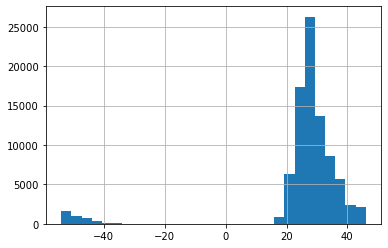

In [17]:
hist_age = data['age'].hist(bins=30)

In [18]:
# Patrząc na hsitogram zmiennej age widzimy, że występuja obserwacje z wiekiem <0. Poniżej weryfikacja problemu.
data[['age', 'DOB']][data['age']<0]

,age,DOB
34,-50,28-May-64
58,-36,20-May-50
89,-54,01-Apr-68
92,-45,21-Oct-59
125,-52,04-Mar-66
...,...,...
86970,-54,17-Feb-68
86974,-52,15-Aug-66
86998,-42,31-Aug-56
87000,-48,01-Nov-62


In [19]:
born = datetime.strptime('28-May-64', '%d-%b-%y').date()
born

datetime.date(2064, 5, 28)

In [20]:
# strptime rok w formacie yy zwraca przypisuje 20yy rok, stąd wartosci ujemne. Problem występuje dla lat poniżej lat 70.

In [21]:
# modyfikacja funkcji zwracającej wiek
def calculate_age(born):
    born = datetime.strptime(born, '%d-%b-%y').date()
    today = date(2015, 1, 1)
    if born.year < 2015:
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    else:
        return today.year - (born.year - 100) - ((today.month, today.day) < (born.month, born.day))
    
data['age'] = data['DOB'].apply(calculate_age)
data[['age', 'DOB']].head()

,age,DOB
0,36,23-May-78
1,29,07-Oct-85
2,33,10-Oct-81
3,27,30-Nov-87
4,30,17-Feb-84


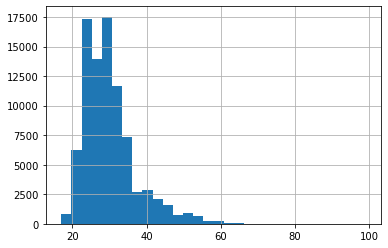

In [22]:
hist_age = data['age'].hist(bins=30)

In [23]:
# Rozkład wieku wygląda teraz poprawnie.

In [24]:
# Usunięcie DOB (data urodzenia) ze zbioru danych. Będziemy wykorzystywać zmienną age.
data.drop(["DOB"], axis=1, inplace=True)

#### Konwersja zmiennych kategorycznych do binarnych

In [25]:
# konwersja zmiennych Gender, Mobile_Verified, Filled_Form, Device_Type do binarnych
data["Gender"] = (data.Gender == "Female").astype(int)
data["Mobile_Verified"] = (data.Mobile_Verified=='Y').astype(int)
data["Filled_Form"] = (data.Filled_Form=="Y").astype(int)
data["Device_Type"] = (data.Device_Type=="Mobile").astype(int)

#### Przekształcenie zmiennych kategorycznych z wieloma kategoriami
Dla każdej zmiennej wybieramy top najpopularniejszych kategorii, pozostałe kumulujemy do jednej kategorii. 
W kolejnym kroku z tak przygotowanych kategorii powstaną zmienne binarne.

In [26]:
data["City"].value_counts()[:15]

Delhi            12527
Bengaluru        10824
Mumbai           10795
Hyderabad         7272
Chennai           6916
Pune              5207
Kolkata           2888
Ahmedabad         1788
Jaipur            1331
Gurgaon           1212
Coimbatore        1147
Thane              905
Chandigarh         870
Surat              802
Visakhapatnam      764
Name: City, dtype: int64

In [27]:
city_list = data["City"].value_counts()[:11].index.tolist()
data['City'] = data['City'].apply(lambda x: x if x in city_list else 'Other')

In [28]:
data["Salary_Account"].value_counts()[:15]

HDFC Bank                  17695
ICICI Bank                 13636
State Bank of India        11843
NA                         11764
Axis Bank                   8783
Citibank                    2376
Kotak Bank                  2067
IDBI Bank                   1550
Punjab National Bank        1201
Bank of India               1170
Bank of Baroda              1126
Standard Chartered Bank      995
Canara Bank                  990
Union Bank of India          951
Yes Bank                     779
Name: Salary_Account, dtype: int64

In [29]:
salary_account_list = data["Salary_Account"].value_counts()[:11].index.tolist()
data['Salary_Account'] = data['Salary_Account'].apply(lambda x: x if x in salary_account_list else 'Other')

In [30]:
data["Employer_Name"].value_counts()[:20]

0                                               4985
TATA CONSULTANCY SERVICES LTD (TCS)              550
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     404
ACCENTURE SERVICES PVT LTD                       324
GOOGLE                                           301
HCL TECHNOLOGIES LTD                             250
ICICI BANK LTD                                   239
INDIAN AIR FORCE                                 191
INFOSYS TECHNOLOGIES                             181
GENPACT                                          179
IBM CORPORATION                                  173
INDIAN ARMY                                      171
TYPE SLOWLY FOR AUTO FILL                        162
WIPRO TECHNOLOGIES                               155
HDFC BANK LTD                                    148
IKYA HUMAN CAPITAL SOLUTIONS LTD                 142
STATE GOVERNMENT                                 134
INDIAN RAILWAY                                   130
INDIAN NAVY                                   

In [31]:
emp_list = data["Employer_Name"].value_counts()[:5].index.tolist()
data['Employer_Name'] = data['Employer_Name'].apply(lambda x: x if x in emp_list else 'Other')

In [32]:
X = pd.get_dummies(data.drop(["Disbursed"], axis=1, inplace=False))

In [33]:
X.shape

(87020, 53)

In [34]:
X.columns[:50]

Index(['Gender', 'Monthly_Income', 'Loan_Amount_Applied',
       'Loan_Tenure_Applied', 'Existing_EMI', 'Mobile_Verified', 'Var5',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var4', 'age', 'City_Ahmedabad', 'City_Bengaluru', 'City_Chennai',
       'City_Coimbatore', 'City_Delhi', 'City_Gurgaon', 'City_Hyderabad',
       'City_Jaipur', 'City_Kolkata', 'City_Mumbai', 'City_Other', 'City_Pune',
       'Employer_Name_0', 'Employer_Name_ACCENTURE SERVICES PVT LTD',
       'Employer_Name_COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD',
       'Employer_Name_GOOGLE', 'Employer_Name_Other',
       'Employer_Name_TATA CONSULTANCY SERVICES LTD (TCS)',
       'Salary_Account_Axis Bank', 'Salary_Account_Bank of Baroda',
       'Salary_Account_Bank of India', 'Salary_Account_Citibank',
       'Salary_Account_HDFC Bank', 'Salary_Account_ICICI Bank',
       'Salary_Account_IDBI Bank', 'Sal

In [35]:
X.head()

,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,...,Salary_Account_Other,Salary_Account_Punjab National Bank,Salary_Account_State Bank of India,Var2_A,Var2_B,Var2_C,Var2_D,Var2_E,Var2_F,Var2_G
0,1,20000,300000.0,5.0,0.0,0,0,-1.0,-1.0,-1.00,...,0,0,0,0,0,0,0,0,0,1
1,0,35000,200000.0,2.0,0.0,1,13,200000.0,2.0,13.25,...,0,0,0,0,0,0,0,0,0,1
2,0,22500,600000.0,4.0,0.0,1,0,450000.0,4.0,-1.00,...,0,0,1,0,1,0,0,0,0,0
3,0,35000,1000000.0,5.0,0.0,1,10,920000.0,5.0,-1.00,...,0,0,1,0,1,0,0,0,0,0
4,0,100000,500000.0,2.0,25000.0,1,17,500000.0,2.0,-1.00,...,0,0,0,0,1,0,0,0,0,0


#### Przypisanie zmiennej celu

In [36]:
y = data.Disbursed
y.value_counts(normalize=True)

0    0.985371
1    0.014629
Name: Disbursed, dtype: float64

Zmienna celu jest silnie niezbilansowana.

## Modelowanie

In [37]:
# Import pakietów

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

C:\Users\Ania\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Podział zbioru danych na uczące i testowe

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Optymalizacja wybranych modeli
Utworzono pipeline'y dla 4 klasyfikatorów: LogisticRegression, DecisionTreeClassifier, XGBClassifier, BaggingClassifier.
W celu zaadresowania problemu niezbilansowania klas dla 2 klasyfikatorów w optymalizacji wykorzystano odpowiednie parametry - dla DecisionTreeClassifier - class_weight, dla XGBClassifier - scale_pos_weight.

In [39]:
models = [
    Pipeline([("scaler", StandardScaler()),
              ("model", LogisticRegression())]),
    Pipeline([("model", DecisionTreeClassifier())]),
    Pipeline([("model", XGBClassifier(max_depth=5))]),
    BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=100,
                          max_samples=0.5)
]

params = [
    {"model__C":[0.01, 0.1, 1, 10, 100],
     "model__penalty":["l2", "l1"]},
    
    {"model__min_samples_leaf":[10, 25, 50, 100],
     "model__max_depth":[None, 10, 20],
     "model__class_weight":[{0:1,1:1},{0:1,1:5},{0:1,1:10}]},
    
    {"model__n_estimators":[50, 100, 200],
     "model__learning_rate":[0.01, 0.05, 0.1],
     "model__scale_pos_weight":[70, 80]}, 
    
    {"base_estimator__min_samples_leaf":[10, 25, 50],
     "base_estimator__max_depth":[None, 10, 20],
     "base_estimator__class_weight":[{0:1,1:1},{0:1,1:5},{0:1,1:10}]}
]

roc_auc = []
precision = []
f1 = []
recall = []


for model, param_grid in zip(models, params):
    optimizer = GridSearchCV(model, param_grid, scoring="precision", cv=10, n_jobs=-1)
    optimizer.fit(X_train, y_train)
    print(model)
    print(optimizer.best_params_)
    roc_auc.append(roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test)[:,1]))
    precision.append(precision_score(y_test, optimizer.best_estimator_.predict(X_test)))
    f1.append(f1_score(y_test, optimizer.best_estimator_.predict(X_test)))
    recall.append(recall_score(y_test, optimizer.best_estimator_.predict(X_test)))

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])
{'model__C': 0.01, 'model__penalty': 'l2'}


C:\Users\Ania\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(steps=[('model', DecisionTreeClassifier())])
{'model__class_weight': {0: 1, 1: 1}, 'model__max_depth': 10, 'model__min_samples_leaf': 10}
Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=5,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=

In [40]:
metrics = {
     'roc_auc': roc_auc, 
     'precision': precision,
     'f1': f1,
     'recall': recall}
metrics = pd.DataFrame(data=metrics)
metrics

,roc_auc,precision,f1,recall
0,0.822462,0.000000,0.000000,0.000000
1,0.752543,0.000000,0.000000,0.000000
2,0.829892,0.054472,0.100822,0.676157
3,0.834381,0.500000,0.007067,0.003559


## Porównanie modeli
Do oceny modeli zostały wybrane metryki roc_auc, precision, f1 i recall. 
Trzy ostatnie mają największe znaczenie w kontekście niezbilansowanie danych, z którymi mamy do czynienia. 
Metryka accuracy jest w tym wypadku zupełnie niemiarodajna. Przykładowo, 98% accuracy może oznacza że wszystkie obserwacje zostały zaklasyfikowane jako 0.

In [47]:
metrics['model'] = ['LogisticRegression', 'DecisionTreeClassifier', 'XGBClassifier', 'BaggingClassifier']
metrics = metrics[['model', 'roc_auc', 'precision', 'f1', 'recall']]
metrics

,model,roc_auc,precision,f1,recall
0,LogisticRegression,0.822462,0.000000,0.000000,0.000000
1,DecisionTreeClassifier,0.752543,0.000000,0.000000,0.000000
2,XGBClassifier,0.829892,0.054472,0.100822,0.676157
3,BaggingClassifier,0.834381,0.500000,0.007067,0.003559


Pierwsze dwa modele klasyfikują wszystkie obserwacje jako 0, co można stwierdzić na podstawie zerowych wartości miar precision, recall i f1. Pozostają nam dwa ostatnie modele, dla których metryki skrajnie sie różnią. XGBClassifier osiąga recall na poziomie 0.67, co oznacza, że ok. 67% obserwacji wskazanych jako 1, rzeczywiście przyjmuje wartość 1. BaggingClassifier osiąga istotnie wyższą wartość precision przy bardzo niskim recall, co może świadczyć o tym, że wartości 1 są słabo przewidywane. Dla potwierdzenia przypuszczeń poniżej zaprezentowano macierz klasyfikacji dla BaggingClassifier.

In [52]:
y_predicted = optimizer.best_estimator_.predict_proba(X_test)[:,1] > 0.5
print(confusion_matrix(y_test, y_predicted))

[[17122     1]
 [  280     1]]


Warto zauważyć, że zmieniając punkt odcięcia z domyślnej wartości 0.5 na wartość 0.1 dla BaggingClassifier otrzymujemy podobne wartości precision i f1 jak dla XGBClassifier. Manipulując wartością punktu odcięcia możemy radzić sobie z problemem silnie niezbilansowanych klas. Recall pozostaje jednak kilka p.p. wyższy dla XGBClassifier. Ten model uznajemy za najlepszy.

In [51]:
y_predicted = optimizer.best_estimator_.predict_proba(X_test)[:,1] > 0.1
print(confusion_matrix(y_test, y_predicted))
print(precision_score(y_test, y_predicted))
print(recall_score(y_test, y_predicted))
print(f1_score(y_test, y_predicted))

[[14311  2812]
 [  105   176]]
0.058902275769745646
0.6263345195729537
0.10767818904863873


## Ostateczna postać modelu

In [55]:
params = {'max_depth': [5], 'learning_rate': [0.1], 'n_estimators': [200], 'scale_pos_weight': [70]}
optimizer = GridSearchCV(XGBClassifier(), param_grid = params, scoring="precision", cv=10, n_jobs=-1)
optimizer.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [56]:
print('roc_auc:', roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test)[:,1]))  
print('precision:', precision_score(y_test, optimizer.best_estimator_.predict(X_test)))  
print('f1:', f1_score(y_test, optimizer.best_estimator_.predict(X_test)))
print('recall:', recall_score(y_test, optimizer.best_estimator_.predict(X_test)))

roc_auc: 0.8298916589058483
precision: 0.05447247706422018
f1: 0.10082249933669407
recall: 0.6761565836298933


Istotność zmiennych

In [64]:
optimizer.best_estimator_.feature_importances_

array([0.02708354, 0.09161529, 0.02207494, 0.01738239, 0.01891751,
       0.00843725, 0.02415768, 0.0199597 , 0.0196513 , 0.02082535,
       0.01503537, 0.01417734, 0.04091212, 0.0163412 , 0.01677954,
       0.01563901, 0.01117079, 0.01946375, 0.02646112, 0.01677892,
       0.01932493, 0.01029722, 0.01382346, 0.00856598, 0.00905004,
       0.01968125, 0.01104091, 0.01425185, 0.01150628, 0.01538199,
       0.01159083, 0.01707179, 0.00690159, 0.0185268 , 0.01299446,
       0.01152255, 0.01475813, 0.01738786, 0.01675046, 0.01716908,
       0.01763705, 0.00822743, 0.10885015, 0.01515155, 0.00735122,
       0.02176738, 0.        , 0.02022075, 0.01285316, 0.00439969,
       0.01748685, 0.01256311, 0.01303004], dtype=float32)

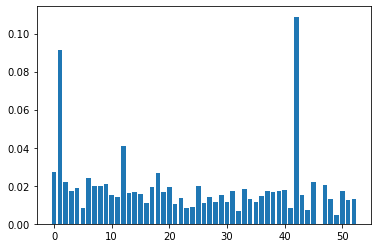

In [65]:
from matplotlib import pyplot
pyplot.bar(range(len(optimizer.best_estimator_.feature_importances_)), optimizer.best_estimator_.feature_importances_)
pyplot.show()

In [67]:
results = pd.DataFrame()
results['columns'] = X_train.columns
results['importances'] = optimizer.best_estimator_.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

,columns,importances
42,Salary_Account_NA,0.108850
1,Monthly_Income,0.091615
12,Filled_Form,0.040912
0,Gender,0.027084
18,City_Chennai,0.026461
6,Var5,0.024158
2,Loan_Amount_Applied,0.022075
45,Salary_Account_State Bank of India,0.021767
9,Interest_Rate,0.020825
47,Var2_B,0.020221


Do najbardziej istotnych zmiennych w wybranym modelu należą Salary_Account_NA, Monthly_Income, Filled_Form, Gender. Obecnośc tych zmiennych w czołówce intuicyjnie wydaje się być uzasadniona biznesowo. Wsród najbardziej istotnych zmiennych znalazła się jedna ze zmiennych z nieznaną definicją - Var5, co pokazuje, że uzwględnienie tej zmiennej okazało się dobrym pomysłem.

### Podsumowanie

Model wybrany jako najlepszy charakteryzuje się dosyć słabą zdolnością predykcyjną. W kolejnych krokach pracy nad usprawnieniem modelu można przeprowadzić bardziej zaawansowaną optymalizację hiperparametrów lub pomyśleć nad innym przekształceniem zmiennych objaśniających. W przeprowadzonej analizie wykorzystano metryki takie takie jak f1, recall, precision, ponieważ za cel do optymalizacji uznano poprawne wykrywanie wartości 1. Podobnie jak pokazano dla BaggingClassifier, dla wybranego modelu również można zastosować inny poziom cut-off niż domyślny. Do podjęcia takich decyzji w praktyce potrzebna jest znajomość otoczenia biznesowego, procesu, który miałby wspomagać ten model - np. jak wiele obserwacji możemy wskazać jako fałszywie pozytywne, aby zidentyfikować jak najwięcej prawdziwie pozytywnych.